In [ ]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, classification_report

# Load dataset
df = pd.read_csv("Restaurants_dataset.csv")

# Handle missing values
num_cols = df.select_dtypes(include=['int64','float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

for col in num_cols:
    df[col].fillna(df[col].median(), inplace=True)

for col in cat_cols:
    df[col].fillna(df[col].mode()[0], inplace=True)

# Encode categorical columns
le = LabelEncoder()
for col in cat_cols:
    df[col] = le.fit_transform(df[col])

#connects to the kernal of python


C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10472\2924255160.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace=True)
C:\Users\ADMIN\AppData\Local\Temp\ipykernel_10472\2924255160.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

In [2]:
#step 1 : check the location columns
df[['Latitude','Longitude']].head()


,Latitude,Longitude
0,14.565443,121.027535
1,14.553708,121.014101
2,14.581404,121.056831
3,14.585318,121.056475
4,14.584450,121.057508


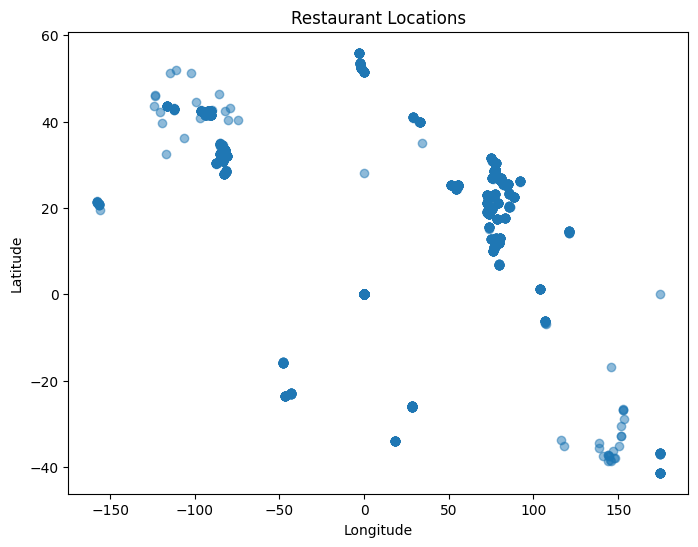

In [3]:
#step plot restaurant locations
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
plt.scatter(df['Longitude'], df['Latitude'], alpha=0.5)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Restaurant Locations")
plt.show()


In [4]:
#step 3: Restaurant count by city 
city_counts = df['City'].value_counts()
city_counts.head(10)


City
88    5473
50    1118
89    1080
43     251
48      25
17      21
69      21
2       21
5       21
51      21
Name: count, dtype: int64

In [5]:
#Step 4 : Average rating by city 
avg_rating_city = df.groupby("City")["Aggregate rating"].mean()
avg_rating_city.sort_values(ascending=False).head(10)


City
56     4.900000
107    4.800000
73     4.650000
95     4.633333
75     4.625000
15     4.600000
67     4.535000
123    4.525000
116    4.500000
66     4.500000
Name: Aggregate rating, dtype: float64

In [6]:
#Step 5 :Price range by city

avg_price_city = df.groupby("City")["Price range"].mean()
avg_price_city.head(10)


City
0    3.300000
1    2.650000
2    2.571429
3    1.700000
4    2.650000
5    1.809524
6    2.800000
7    2.000000
8    1.600000
9    3.050000
Name: Price range, dtype: float64